In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ml_data\ds_salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
#EDA

In [15]:
df['experience_level']=df['experience_level'].str.replace('EN','Entry-level')
df['experience_level']=df['experience_level'].str.replace('SE','Senior-level')
df['experience_level']=df['experience_level'].str.replace('MI','Mid-level')
df['experience_level']=df['experience_level'].str.replace('EX','Executive-level')

In [16]:
df['experience_level'].value_counts()

Senior-level       2516
Mid-level           805
Entry-level         320
Executive-level     114
Name: experience_level, dtype: int64

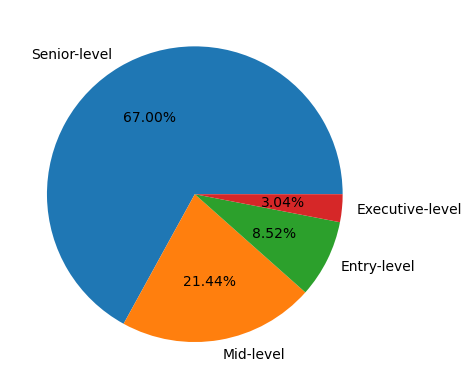

In [17]:
plt.pie(df['experience_level'].value_counts(),labels=df['experience_level'].value_counts().index,autopct='%1.2f%%')
plt.show()

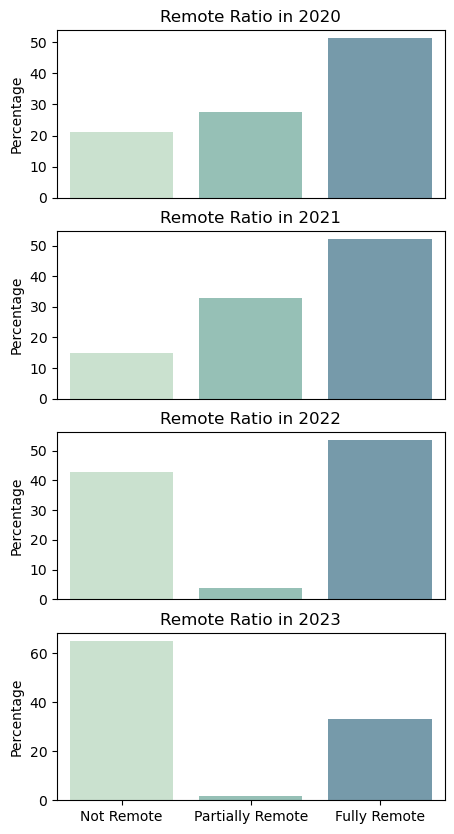

In [18]:
# plot remote ratio per work year

fig, axs = plt.subplots(4, 1, figsize=(5, 10))

# plot each year's remote ratios as barplots
for i, year in enumerate([2020, 2021, 2022, 2023]):
    year_df = df[df['work_year'] == year]
    remote_ratio_counts = year_df['remote_ratio'].value_counts(normalize=True)
    colors = sns.cubehelix_palette(start=.8, rot=-.7)
    sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_counts.values*100, ax=axs[i], palette=colors)
    axs[i].set_title(f'Remote Ratio in {year}')
    axs[i].set_ylabel('Percentage')
    if year == 2023:
        axs[i].set_xticklabels(['Not Remote', 'Partially Remote','Fully Remote'])
    else:
        axs[i].set_xticks([])
    axs[i].set_xlabel('')
    
plt.show()

In [19]:
## Observation: Due to the pandemic, in 2020 and 2021, remote work was popular, but in 2022 the percentage of people going into office increased.

In [20]:
# Salaries by year
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-level,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-level,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


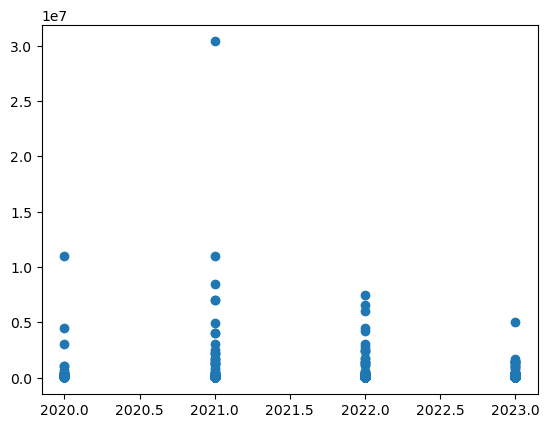

In [21]:
plt.scatter(x='work_year',y='salary',data=df)

In [23]:
salary_year=df.groupby(['work_year'],as_index=False)['salary'].sum().sort_values(by='salary',ascending=False)
salary_year

,work_year,salary
3,2023,286280943
2,2022,275260572
1,2021,125157548
0,2020,29362809


<Axes: title={'center': 'Salary vs Year'}, xlabel='work_year', ylabel='salary'>

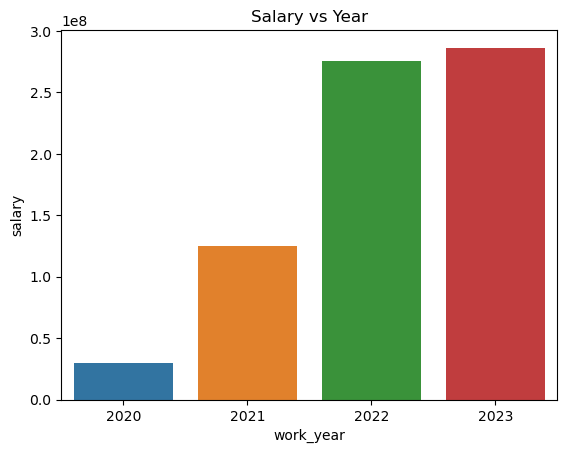

In [25]:
plt.title("Salary vs Year")
sns.barplot(x='work_year',y='salary',data=salary_year)

In [ ]:
# Year by year the salaries of the empolies get increased

In [ ]:
# Salaries wr.to experience_level

In [31]:
experience_salary=df.groupby(['experience_level'],as_index=False)['salary_in_usd'].sum().sort_values(by='salary_in_usd',ascending=False)
experience_salary

,experience_level,salary_in_usd
3,Senior-level,385076496
2,Mid-level,84143381
0,Entry-level,25134811
1,Executive-level,22222126


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

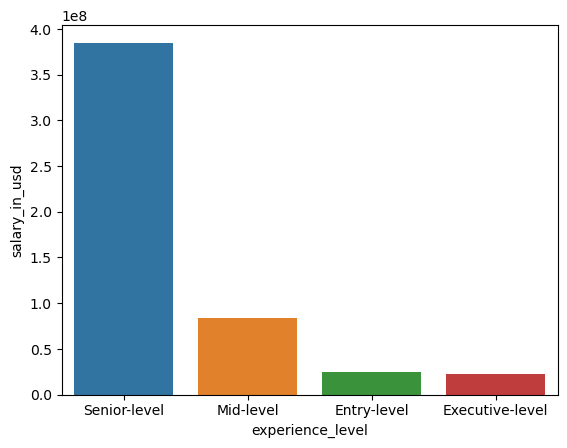

In [32]:
sns.barplot(x='experience_level',y='salary_in_usd',data=experience_salary)

In [33]:
# As the experience level increase the salary is also increase

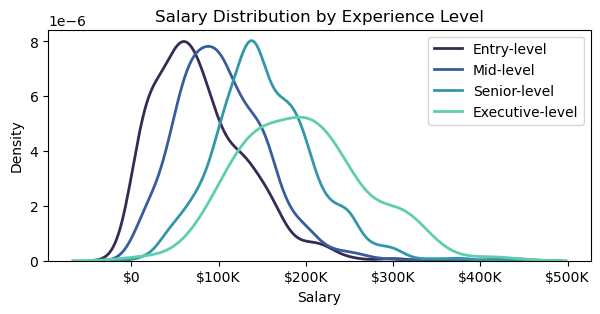

In [35]:
import warnings
warnings.filterwarnings('ignore')
entry_salary = df[df['experience_level'] == 'Entry-level']['salary_in_usd']
mid_salary = df[df['experience_level'] == 'Mid-level']['salary_in_usd']
senior_salary = df[df['experience_level'] == 'Senior-level']['salary_in_usd']
exec_salary = df[df['experience_level'] == 'Executive-level']['salary_in_usd']

# plot salary distribution by experience level
fig, axs = plt.subplots(figsize=(7, 3))
colors = sns.color_palette("mako", 4)
sns.kdeplot(entry_salary, ax=axs, shade=False, color=colors[0], label='Entry-level', linewidth=2)
sns.kdeplot(mid_salary, ax=axs, shade=False, color=colors[1], label='Mid-level', linewidth=2)
sns.kdeplot(senior_salary, ax=axs, shade=False, color=colors[2], label='Senior-level', linewidth=2)
sns.kdeplot(exec_salary, ax=axs, shade=False, color=colors[3], label='Executive-level', linewidth=2)
axs.set_title('Salary Distribution by Experience Level')
axs.set_xticks([0, 100000, 200000, 300000, 400000, 500000])
axs.set_xticklabels(['$0', '$100K', '$200K', '$300K', '$400K', '$500K'])
axs.set_xlabel('Salary')
axs.set_ylabel('Density')
axs.legend(facecolor='white')
plt.show()

In [37]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

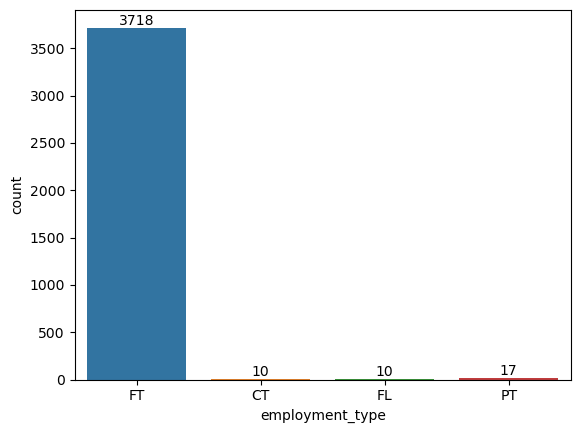

In [43]:
ax=sns.countplot(x='employment_type',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [44]:
# most of the employees are doing full time job..so the salary of full time employees are more

In [45]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-level,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-level,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


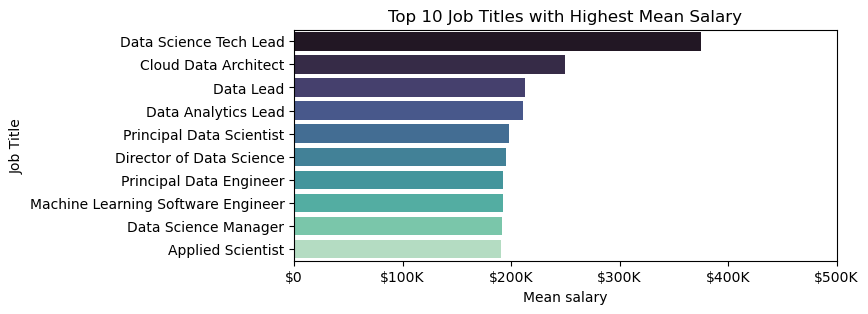

In [46]:
# top 10 job title of those with biggest mean salary
fig, axs = plt.subplots(figsize=(7, 3))
colors = sns.color_palette("mako", 10)

# get top 10 job titles with highest mean salary
top_10_titles = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10]

sns.barplot(x=top_10_titles.values, y=top_10_titles.index, ax=axs, palette=colors)
axs.set_title('Top 10 Job Titles with Highest Mean Salary')
axs.set_xlabel('Mean salary')
axs.set_ylabel('Job Title')
axs.set_xticks([0, 100000, 200000, 300000, 400000, 500000])
axs.set_xticklabels(['$0', '$100K', '$200K', '$300K', '$400K', '$500K'])
plt.show()

In [49]:
job_salary=df.groupby(['job_title'],as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10)
job_salary

,job_title,salary_in_usd
46,Data Science Tech Lead,375000.000000
19,Cloud Data Architect,250000.000000
35,Data Lead,212500.000000
28,Data Analytics Lead,211254.500000
84,Principal Data Scientist,198171.125000
53,Director of Data Science,195140.727273
83,Principal Data Engineer,192500.000000
75,Machine Learning Software Engineer,192420.000000
45,Data Science Manager,191278.775862
8,Applied Scientist,190264.482759


<Axes: xlabel='job_title', ylabel='salary_in_usd'>

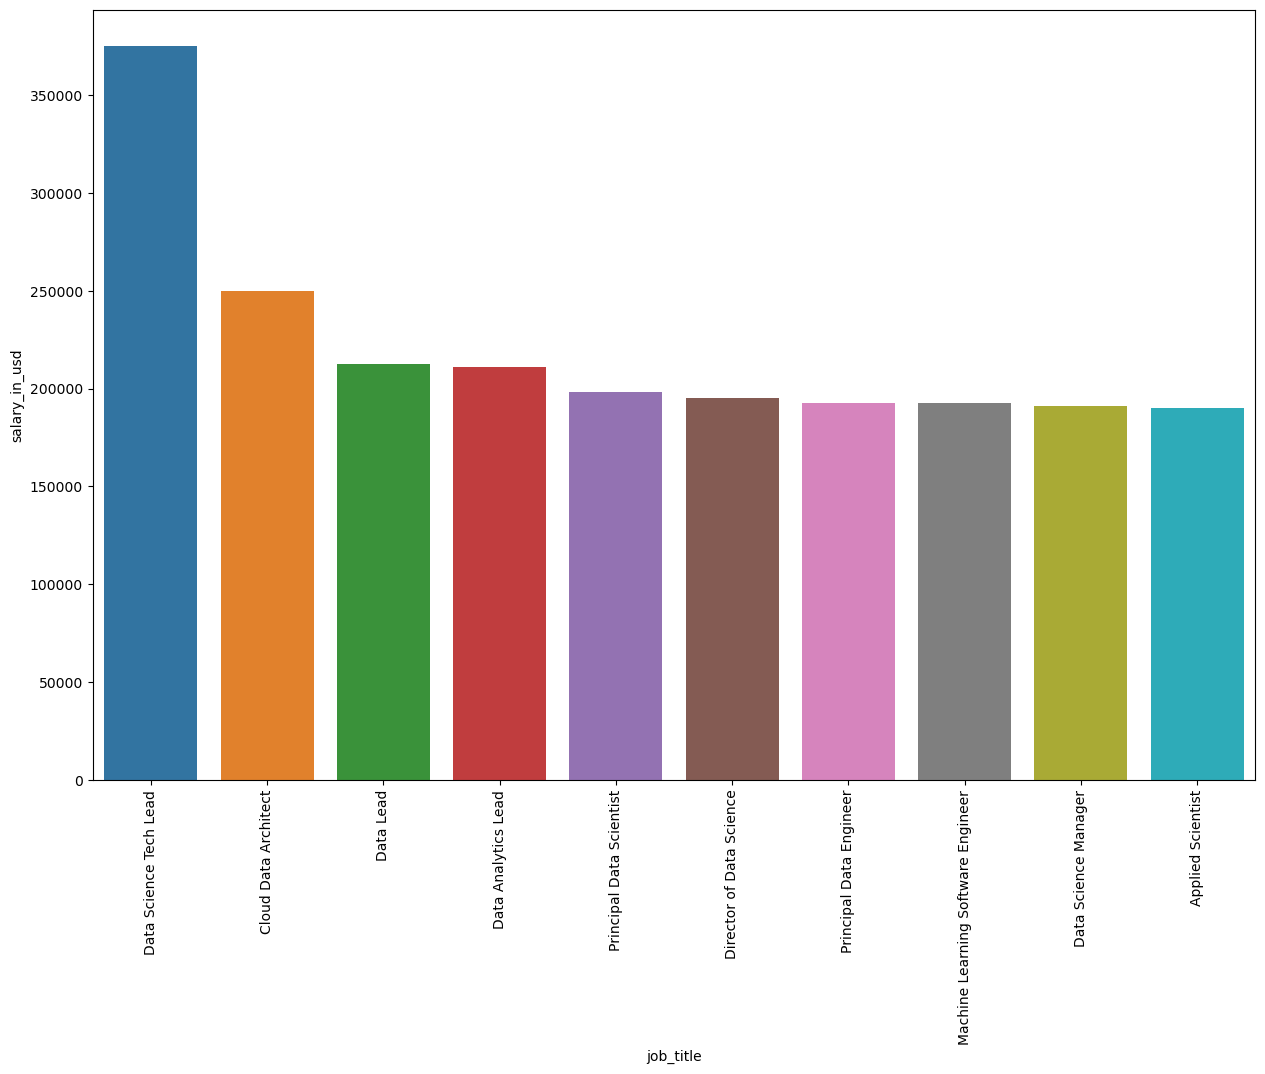

In [53]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x='job_title',y='salary_in_usd',data=job_salary)

In [ ]:
# Is there country wise there is changes in salary

In [54]:
df['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

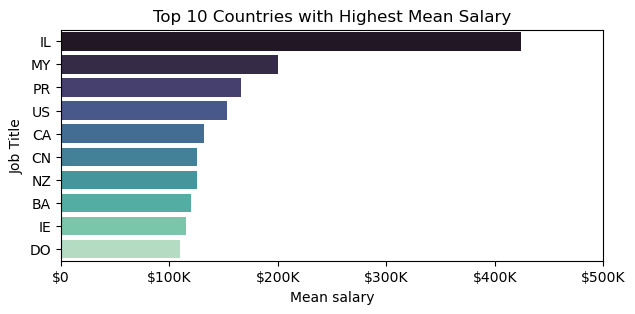

In [56]:
# top 10 job title of those with biggest mean salary
fig, axs = plt.subplots(figsize=(7, 3))
colors = sns.color_palette("mako", 10)

# get top 10 job titles with highest mean salary
top_10_titles = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:10]

sns.barplot(x=top_10_titles.values, y=top_10_titles.index, ax=axs, palette=colors)
axs.set_title('Top 10 Countries with Highest Mean Salary')
axs.set_xlabel('Mean salary')
axs.set_ylabel('Job Title')
axs.set_xticks([0, 100000, 200000, 300000, 400000, 500000])
axs.set_xticklabels(['$0', '$100K', '$200K', '$300K', '$400K', '$500K'])
plt.show()

In [57]:
# Yes,there is changes in salary country wise

In [ ]:
# country wise remote location

In [64]:
df.groupby(['remote_ratio'],as_index=False)['employee_residence'].value_counts().sort_values(by='remote_ratio',ascending=False)

,remote_ratio,employee_residence,count
139,100,AT,1
99,100,AU,6
111,100,AE,2
110,100,CL,2
109,100,RU,2
...,...,...,...
27,0,PK,1
26,0,RO,1
25,0,RU,1
24,0,UZ,1


In [65]:
## As we can see remote work is not very much popular

In [66]:
# Whether the company size affecting the salaries of employees??

In [68]:
comapny_salary=df.groupby(['company_size'],as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
comapny_salary

,company_size,salary_in_usd
1,M,143130.548367
0,L,118300.982379
2,S,78226.682432


<Axes: xlabel='company_size', ylabel='salary_in_usd'>

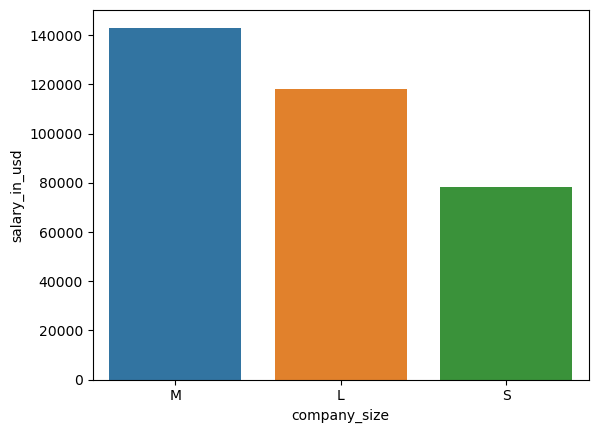

In [70]:
sns.barplot(x='company_size',y='salary_in_usd',data=comapny_salary)

In [71]:
# yes! the size of company  matters,the salary of employees is more if he/she is worked for medium and large size of company

In [ ]:
# 